In [3]:
import pandas as pd
import numpy as np
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.model_selection import TimeSeriesSplit, train_test_split, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import matplotlib.pyplot as plt

# Library configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set output options
pd.set_option('display.max_columns', 3000)
pd.options.display.max_rows = 999

In [4]:
aapl = pd.read_csv('data/preprocessed/Aapl_NewsPriceHistDirection.csv')
aapl.shape
print('AAPL:')
aapl.head()

amzn = pd.read_csv('data/preprocessed//Amzn_NewsPriceHistDirection.csv')
amzn.shape
print('AMZN:')
amzn.head()

(69622, 55)

AAPL:


,uuid,author,url,title,language,text,published,title_aapl,text_aapl,title_amzn,text_amzn,title_posSent,title_neg_sent,title_net_sent,text_pos_sent,text_neg_sent,text_net_sent,entity_pos_sent,entity_neg_sent,entity_net_sent,title_entities,text_entities,prediction_date,open,high,low,close,volume,direction,pct_chng,prevClose_1,prevClose_2,prevClose_3,prevClose_4,prevClose_5,prevClose_6,prevClose_7,prevClose_8,prevClose_9,prevClose_10,prevClose_11,prevClose_12,prevClose_13,prevClose_14,prevClose_15,prevClose_16,prevClose_17,prevClose_18,prevClose_19,prevClose_20,prevClose_21,prevClose_22,prevClose_23,prevClose_24,prevClose_25
0,3f884eef1ee888c2053c8eed3dda913e54a568f9,admin,http://www.wallstreetreporter.com/2018/09/the-...,The evidence is mounting that Apple&apos;s nex...,english,"September 2, 2018 admin Trading Ideas Comments...",2018-09-02 12:00:00+00:00,True,True,False,False,0.292428,0.009908,0.697664,0.041162,0.033188,0.925649,0.096885,0.029284,0.873831,"[{'entity_group': 'ORG', 'score': 0.86504984, ...","[{'entity_group': 'MISC', 'score': 0.8753462, ...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
1,4bb3cfd0aaf0ffd7c843695d28a6c7f97c005f0a,Jon Swartz,https://www.barrons.com/articles/regulation-is...,"Regulation Is the Risk as Facebook, Twitter, H...",english,"Sheryl Sandberg, chief operating officer of Fa...",2018-08-31 18:33:00+00:00,False,True,False,False,0.038350,0.353034,0.608616,0.034434,0.238836,0.726730,0.037567,0.514139,0.448294,"[{'entity_group': 'MISC', 'score': 0.934303, '...","[{'entity_group': 'PER', 'score': 0.998726, 'w...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
2,0568ab64d8949b6aca4db001b1d3362d0721a618,PATRICK SEITZ,https://www.investors.com/news/technology/clic...,Apple Stock Gets Price-Target Hikes Ahead Of N...,english,With Apple stock trading near its all-time hig...,2018-09-04 00:00:00+00:00,True,True,False,False,0.538069,0.373904,0.088027,0.251128,0.019059,0.729814,0.608991,0.071097,0.319912,"[{'entity_group': 'ORG', 'score': 0.9655371, '...","[{'entity_group': 'ORG', 'score': 0.7043, 'wor...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
3,21c864caa4c53bffae9b4674eebe93d99bed9ceb,NaN,https://www.barrons.com/articles/stocks-rise-a...,"Stocks Rise, as Trade and Tech Remain Familiar...",english,President Trump was reported to be in favor of...,2018-09-01 02:55:00+00:00,False,True,False,True,0.233226,0.399302,0.367471,0.135174,0.062387,0.802438,0.701790,0.033941,0.264270,"[{'entity_group': 'MISC', 'score': 0.480398, '...","[{'entity_group': 'PER', 'score': 0.98648983, ...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
4,aad9eb49815cbf6f6a85c1167868ef29f5649c5f,"Ashraf Eassa, The Motley Fool",https://sg.finance.yahoo.com/news/tim-cook-hel...,How Tim Cook Has Helped Make Apple Shareholder...,english,Tim Cook became Apple 's (NASDAQ: AAPL) CEO on...,2018-09-01 06:05:00+00:00,True,True,False,False,0.214392,0.011442,0.774166,0.522637,0.050985,0.426378,0.343107,0.106315,0.550579,"[{'entity_group': 'PER', 'score': 0.99408, 'wo...","[{'entity_group': 'PER', 'score': 0.9985752, '...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195

(19079, 55)

AMZN:


,uuid,author,url,title,language,text,published,title_aapl,text_aapl,title_amzn,text_amzn,title_posSent,title_neg_sent,title_net_sent,text_pos_sent,text_neg_sent,text_net_sent,entity_pos_sent,entity_neg_sent,entity_net_sent,title_entities,text_entities,prediction_date,open,high,low,close,volume,direction,pct_chng,prevClose_1,prevClose_2,prevClose_3,prevClose_4,prevClose_5,prevClose_6,prevClose_7,prevClose_8,prevClose_9,prevClose_10,prevClose_11,prevClose_12,prevClose_13,prevClose_14,prevClose_15,prevClose_16,prevClose_17,prevClose_18,prevClose_19,prevClose_20,prevClose_21,prevClose_22,prevClose_23,prevClose_24,prevClose_25
0,3b7327f6858be72e780b02b863d941fe7ce81eab,NaN,https://money.cnn.com/2018/09/05/investing/pre...,6 things to know before the opening bell,english,Click chart for more in-depth data. 1. Big Tec...,2018-09-05 05:12:00+00:00,False,True,False,True,0.060998,0.040879,0.898123,0.029282,0.568029,0.402689,0.282342,0.013111,0.704547,"[{'entity_group': 'MISC', 'score': 0.8700097, ...","[{'entity_group': 'MISC', 'score': 0.96541995,...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
1,8a3015a274df99d231fcf7ff3eb38e2660a984ff,Michael Wiggins De Oliveira,https://seekingalpha.com/article/4203857-netfl...,"Netflix And The Competition - Netflix, Inc. (N...",english,Investment Thesis Netflix ( NFLX ) is a remark...,2018-09-04 15:00:00+00:00,False,True,False,True,0.031161,0.021816,0.947023,0.072877,0.028435,0.898688,0.325566,0.064595,0.609839,"[{'entity_group': 'ORG', 'score': 0.99179953, ...","[{'entity_group': 'MISC', 'score': 0.988969, '...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
2,df5883d078ebfbe015e1e717002e4b889647dbee,Larry Ramer,https://investorplace.com/2018/09/pandora-stoc...,Pandora Stock Gets a Boost — Buy Now,english,MannKind Surges More Than 50% >>> READ MORE\nB...,2018-09-04 16:22:00+00:00,False,True,False,True,0.602235,0.020212,0.377553,0.152033,0.019961,0.828006,0.464281,0.018634,0.517085,"[{'entity_group': 'MISC', 'score': 0.9902256, ...","[{'entity_group': 'MISC', 'score': 0.9231871, ...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
3,861c19bff56d09f97b6798f5fbe374061e8aa55b,morningstar.com,http://news.morningstar.com/all/dow-jones/us-m...,MARKET SNAPSHOT: Tech Tumble Weighs On Stocks;...,english,"By Mark DeCambre, MarketWatch , Ryan Vlastelic...",2018-09-05 00:00:00+00:00,False,True,False,True,0.149068,0.775664,0.075268,0.011017,0.919701,0.069282,0.025404,0.937170,0.037426,"[{'entity_group': 'MISC', 'score': 0.98928815,...","[{'entity_group': 'PER', 'score': 0.99841535, ...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
4,cb960bebc2bf78d327026127c9fe919a4159e80d,morningstar.com,http://news.morningstar.com/all/benzinga/BenzB...,"New Month, Same Old Story: Trade Fears Persist...",english,"It may be a new month, but the same trade conc...",2018-09-05 00:00:00+00:00,False,True,False,True,0.012341,0.952132,0.035526,0.118360,0.425631,0.456009,0.064799,0.573251,0.361949,"[{'entity_group': 'MISC', 'score': 0.9838889, ...","[{'entity_group': 'ORG', 'score': 0.6127569, '...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.8

In [7]:
def log_reg_cv(df, stock, desc, features, label, print_summary=False, print_box_plot=False):
    X = df[features]
    y = df[label]

    clf = LogisticRegression(random_state=0, max_iter=10e10, n_jobs=-1)
    results = pd.DataFrame(cross_validate(clf, X, y, cv=12, scoring=['accuracy', 'precision', 'recall', 'f1']))

    if print_box_plot:
        results.drop('fit_time', axis=1).plot.box(figsize=(10, 5))

    summary = results.describe()
    if print_summary:
        display(summary.loc['mean',:])

    summary = summary.loc['mean',:]
    summary['stock'] = stock
    summary['desc'] = desc
    return summary


#### What sentiment score are the best at predicting direction

In [4]:
sentiment_results = []

# Title sentiment
feat = [
    'title_posSent',
    'title_neg_sent',
    'title_net_sent',
]
label = 'direction'

sentiment_results.append(log_reg_cv(aapl, 'AAPL', 'Title Sentiment', feat, label))
sentiment_results.append(log_reg_cv(amzn, 'AMZN', 'Title Sentiment', feat, label))


# Text sentiment
feat = [
    'text_pos_sent',
    'text_neg_sent',
    'text_net_sent'
 ]
label = 'direction'

sentiment_results.append(log_reg_cv(aapl, 'AAPL', 'Text Sentiment', feat, label))
sentiment_results.append(log_reg_cv(amzn, 'AMZN', 'Text Sentiment', feat, label))


# Entity Sentiment
feat = [
    'entity_pos_sent',
    'entity_neg_sent',
    'entity_net_sent'
 ]
label = 'direction'

sentiment_results.append(log_reg_cv(aapl, 'AAPL', 'Entity Sentiment', feat, label))
sentiment_results.append(log_reg_cv(amzn, 'AMZN', 'Entity Sentiment', feat, label))

pd.DataFrame(sentiment_results).sort_values('stock')

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,stock,desc
mean,0.535783,0.008480,0.524015,0.520141,0.146939,0.226442,AAPL,Title Sentiment
mean,0.585761,0.007409,0.529315,0.536990,0.141338,0.222938,AAPL,Text Sentiment
mean,0.619295,0.008142,0.534529,0.528902,0.255877,0.341899,AAPL,Entity Sentiment
mean,0.041040,0.002373,0.499188,0.505939,0.684077,0.576527,AMZN,Title Sentiment
mean,0.016075,0.003461,0.518475,0.518041,0.801836,0.628637,AMZN,Text Sentiment
mean,0.026758,0.003345,0.511611,0.513088,0.800093,0.624494,AMZN,Entity Sentiment


#### How many days of closing price should be included?

In [5]:
prevClose = [
    'prevClose_1',
    'prevClose_2',
    'prevClose_3',
    'prevClose_4',
    'prevClose_5',
    'prevClose_6',
    'prevClose_7',
    'prevClose_8',
    'prevClose_9',
    'prevClose_10',
    'prevClose_11',
    'prevClose_12',
    'prevClose_13',
    'prevClose_14',
    'prevClose_15',
    'prevClose_16',
    'prevClose_17',
    'prevClose_18',
    'prevClose_19',
    'prevClose_20',
    'prevClose_21',
    'prevClose_22',
    'prevClose_23',
    'prevClose_24',
    'prevClose_25'
]
label = 'direction'

aapl_prevClose_accuracies = []
amzn_prevClose_accuracies = []
for i in range(len(prevClose)):
    precClose_feat = prevClose[0:i+1]
    aapl_prevClose_accuracies.append(log_reg_cv(aapl, 'AAPL', f'{i+1} days close price', precClose_feat, label)['test_accuracy'])
    amzn_prevClose_accuracies.append(log_reg_cv(amzn, 'AMZN', f'{i+1} days close price', precClose_feat, label)['test_accuracy'])


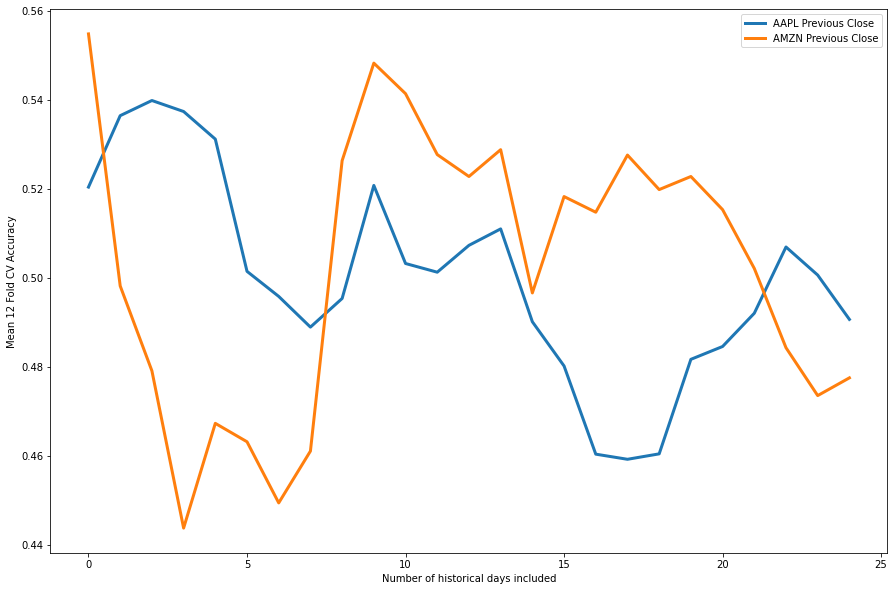

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.plot(aapl_prevClose_accuracies, label='AAPL Previous Close', linewidth=3)
_ = ax.plot(amzn_prevClose_accuracies, label='AMZN Previous Close', linewidth=3)
_ = ax.legend()
_ = ax.set_ylabel('Mean 12 Fold CV Accuracy')
_ = ax.set_xlabel('Number of historical days included')

#### Recursive feature selection

In [8]:
from sklearn.feature_selection import RFE

def recursive_feature_selection(df, feat, label, stock, desc, n_feat=10):
    clf = LogisticRegression(random_state=0, max_iter=10e10, n_jobs=-1)
    selector = RFE(clf, n_features_to_select=n_feat, step=1)
    X, y = df[feat], df[label]
    selector = selector.fit(X, y)

    X = X.loc[:, X.columns[selector.support_]]
    
    res = log_reg_cv(df, stock, desc, list(X.columns), 'direction')

    return {
        'best_feat': list(X.columns),
        'results': res
    }

In [9]:
feat = [
 'title_posSent',
 'title_neg_sent',
 'title_net_sent',
 'text_pos_sent',
 'text_neg_sent',
 'text_net_sent',
 'entity_pos_sent',
 'entity_neg_sent',
 'entity_net_sent',
 'prevClose_1',
 'prevClose_2',
 'prevClose_3',
 'prevClose_4',
 'prevClose_5',
 'prevClose_6',
 'prevClose_7',
 'prevClose_8',
 'prevClose_9',
 'prevClose_10',
 'prevClose_11',
 'prevClose_12',
 'prevClose_13',
 'prevClose_14',
 'prevClose_15',
 'prevClose_16',
 'prevClose_17',
 'prevClose_18',
 'prevClose_19',
 'prevClose_20',
 'prevClose_21',
 'prevClose_22',
 'prevClose_23',
 'prevClose_24',
 'prevClose_25']
label = 'direction'

print('AAPL RFS:')
aapl_rfs = recursive_feature_selection(aapl, feat, label, 'AAPL', 'AAPL RFS', n_feat=10)
aapl_rfs

print('AMZN RFS:')
amzn_rfs = recursive_feature_selection(amzn, feat, label, 'AMZN', 'AMZN RFS', n_feat=10)
amzn_rfs

AAPL RFS:


{'best_feat': ['title_posSent',
  'title_neg_sent',
  'title_net_sent',
  'text_pos_sent',
  'text_neg_sent',
  'text_net_sent',
  'entity_pos_sent',
  'entity_net_sent',
  'prevClose_17',
  'prevClose_23'],
 'results': fit_time           0.89148
 score_time        0.013291
 test_accuracy     0.596562
 test_precision    0.612311
 test_recall       0.564604
 test_f1           0.556027
 stock                 AAPL
 desc              AAPL RFS
 Name: mean, dtype: object}

AMZN RFS:


{'best_feat': ['prevClose_7',
  'prevClose_8',
  'prevClose_9',
  'prevClose_10',
  'prevClose_14',
  'prevClose_15',
  'prevClose_16',
  'prevClose_17',
  'prevClose_18',
  'prevClose_22'],
 'results': fit_time          0.669239
 score_time        0.012468
 test_accuracy     0.579957
 test_precision      0.5823
 test_recall       0.594448
 test_f1           0.581174
 stock                 AMZN
 desc              AMZN RFS
 Name: mean, dtype: object}

#### Hyperparameter tuning w/ grid search

In [10]:
from sklearn.model_selection import GridSearchCV

def tune_log_reg_hyperparams(df, feat, label):
    parameters = {
        'penalty': ('l1', 'l2', 'elasticnet', 'none'), 
        'C': [100, 10, 1.0, 0.1, 0.01]
    }
    grid_clf = GridSearchCV(
        LogisticRegression(random_state=0, max_iter=10e10, n_jobs=-1), 
        parameters
    )
    grid_clf.fit(df[feat], df[label])

    clf = LogisticRegression(random_state=0, max_iter=10e10, n_jobs=-1, **grid_clf.best_params_)
    results = pd.DataFrame(cross_validate(clf, df[feat], df[label], cv=12, scoring=['accuracy', 'precision', 'recall', 'f1']))
    return {
        'best_params': grid_clf.best_params_,
        'results': results.describe()
    }


print('Apple tuned log reg using RFS features: ')
aapl_tuned_logreg = tune_log_reg_hyperparams(aapl, aapl_rfs['best_feat'], 'direction')
aapl_tuned_logreg['results']

print('Amazon tuned log reg using RFS features: ')
amzn_tuned_logreg = tune_log_reg_hyperparams(amzn, amzn_rfs['best_feat'], 'direction')
amzn_tuned_logreg['results']

Apple tuned log reg using RFS features: 


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.984209,0.014408,0.595327,0.610846,0.562808,0.553196
std,0.192146,0.004526,0.077724,0.143184,0.217654,0.129547
min,0.797629,0.005460,0.443889,0.437658,0.177866,0.284238
25%,0.816873,0.012794,0.567520,0.544440,0.422027,0.497482
50%,0.919667,0.015051,0.585796,0.585198,0.554357,0.545132
75%,1.107652,0.017031,0.649905,0.639188,0.681459,0.661597
max,1.344213,0.020485,0.694416,0.990291,0.924901,0.724465


Amazon tuned log reg using RFS features: 


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.674367,0.008628,0.604852,0.615654,0.579736,0.590813
std,0.072560,0.003453,0.121461,0.125859,0.180864,0.146348
min,0.583337,0.004691,0.386164,0.392718,0.307028,0.367062
25%,0.627483,0.006620,0.552673,0.563809,0.467169,0.509996
50%,0.653048,0.008204,0.605031,0.619023,0.587294,0.610046
75%,0.722117,0.009358,0.680975,0.690450,0.722190,0.690497
max,0.839056,0.018406,0.798742,0.798535,0.837037,0.809069


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(aapl[aapl_rfs['best_feat'] + ['author']], aapl['direction'], test_size=0.5, random_state=None, shuffle=False)
clf = LogisticRegression(random_state=0, max_iter=10e10, n_jobs=-1, **aapl_tuned_logreg['best_params'])

author = X_test['author']
X_train = X_train.drop('author', axis=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test.drop('author', axis=1))

res = pd.DataFrame({
    'author': author,
    'true_label': y_test,
    'pred_label': pred
})
res['correct_pred'] = res['true_label'] == res['pred_label']

accuracy_score(pred, y_test)
res




LogisticRegression(C=0.01, max_iter=100000000000.0, n_jobs=-1, random_state=0)

0.5874867139697222

,author,true_label,pred_label,correct_pred
34811,ABMN Staff,1,-1,False
34812,JF Staff,1,-1,False
34813,NaN,1,-1,False
34814,admin,1,-1,False
34815,sfgate.com,1,-1,False
...,...,...,...,...
69617,Motley Fool,-1,1,False
69618,Jussi Askola,-1,1,False
69619,Marguerite Chambers,-1,1,False
69620,Darrin Black,-1,1,False


### What authors/sources are the best at predicting direction?

In [12]:
def author_stats(df):
    res = {
        'proportion_correct': df['correct_pred'].sum() / df.shape[0],
        'total_correct': df['correct_pred'].sum(),
        'total_articles': df.shape[0],
        'correctXtotal': df['correct_pred'].sum() * df.shape[0]
    }
    return pd.Series(res, index=['proportion_correct', 'total_correct', 'total_articles', 'correctXtotal'])

best_sources = (res.groupby('author')
    .apply(author_stats)
    .reset_index()
    .sort_values(['proportion_correct', 'total_articles'], ascending=False)
    # .sort_values(['correctXtotal'], ascending=False)
    # .sort_values(['total_articles', 'total_correct'], ascending=False)
)

best_sources.head(25)


,author,proportion_correct,total_correct,total_articles,correctXtotal
1718,Profit Confidential,1.0,12.0,12.0,144.0
1652,Patient Tech Investor,1.0,9.0,9.0,81.0
2147,Tom Teodorczuk,1.0,9.0,9.0,81.0
2435,newsfeedback@fool.com (Natalie Walters),1.0,9.0,9.0,81.0
322,Benjamin Mayo,1.0,7.0,7.0,49.0
667,DiscoverGold,1.0,7.0,7.0,49.0
1964,Sruthi Shankar,1.0,7.0,7.0,49.0
2422,newsfeedback@fool.com (Harsh Chauhan),1.0,7.0,7.0,49.0
987,Jack Hough,1.0,6.0,6.0,36.0
1050,Jeffry Bartash,1.0,6.0,6.0,36.0


In [13]:
best_sources[
    (best_sources['proportion_correct'] >= 0.75)
].sort_values('total_articles', ascending=False)

,author,proportion_correct,total_correct,total_articles,correctXtotal
918,Henry Gaston,0.798077,83.0,104.0,8632.0
518,Cnn News,0.754386,43.0,57.0,2451.0
1384,Mark Dietrich,0.750000,33.0,44.0,1452.0
596,Danny Vena,0.750000,24.0,32.0,768.0
993,Jacob Passy,0.766667,23.0,30.0,690.0
...,...,...,...,...,...
958,Investor's Business Daily,1.000000,1.0,1.0,1.0
967,Isaac Pino,1.000000,1.0,1.0,1.0
968,"Isaac Pino, CPA",1.000000,1.0,1.0,1.0
969,"Isaac Pino, CPA, The Motley Fool",1.000000,1.0,1.0,1.0
